<a href="https://colab.research.google.com/github/talathkhaleel1/learning/blob/main/Data_Analytics_2_Home_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1
 What are the steps if the dataset were "big data"?
○	Theoretical question!
○	Please create a code in a markdown cell, which represents a basic big data pipeline (with explicative steps).
○	If you want use pseudo-code.


# Introduction - Handling "Big Data"

- What is Big Data?

  Analysing data or processing problems which cannot be solved using tradional software tools **in reasonable time** because of **volume** and **velocity** of data is called Big Data.

  Big data works on **ETL** framework. That is to *extract, transform and load* data.

- Where to store "Big Data"?

  It is always recommended to store big data on cloud computing platforms with encryption / security settings. There are variou cloud platform providers such as AWS, Microsoft Azure, Google cloud, etc. If premise servers are available, then private cloud platform with built in facilities may be used to store data.

- Some **Big Data Tools**

  There are multiple big data tools rendering various services, such as *Hive for data warehousing, Cassandra for nosequel database, Apache spark for real-time processing of data, etc.* There are multiple such data-related software tools that are integrated with Apache spark

  Note:  Here we will be using **Apache Spark** and its **DataBricks** platform to answer our question 1



What is **Apache Spark**?

Spark is an open-source, unified engine for real-time processing of large-scale data and its analysis. It was created with a vision of ease of use, increased speed and sophisticated analysis of big data sets. Spark rums programms much faster than other competing platforms. Spark is has a multi-lingual approach, that means it provides high-level APIs in languages of Java, Scala, Python, SQL and R.

- Some **features of Spark module**:
1. Enables processing of **data using clusters** (multiple machines)
2. Facilitates **batch-wise data processing** (multiple .csv files or even multiple file_types can be processed at a single time)
3. Facilitates **live-streaming data processing** (processing data whose source of input is via the data fluctuations on websites)
4. Enables **SQL analytics** (interactive query handling)
5. Supports **machine learning** (train machine learning algorithms and leverage the same code to scale to fault-tolerent clusters of large number of machines)
6. Helps to perform **data science activities at scale** (conduct EDA - exploratory data analysis on large data without resorting to downsampling of data)
7. **Graph-x** is a feature of Apache Spark for data visulaisation (processing graphs and enabling better data visualisation)



## Understanding DataBricks platform

The *Python API* for Spark is called *PySpark*.

**Note**: We are using the community version of Spark. The paid version will have many more added features.

Once we register and login, we can navigate through the menu bar.
Let ustake  alook at various menu options that are of concern to us:

1. Workspace: It follows a notebook based system (just like jupyter notebook) of programming. Under workspace we can create and store notebooks.
2. Data: Here we can create and store data-tables and databases
3. Compute: This is the most important tab of the menu bar. No notebook can work without computation powers. It is here that a cluster is created and launched.

What happens at the back-end when you create a cluster?

A cluster is basically a set of machines that are created and operated on the cloud platform. Among these machines is one driver machine which is visible to users on the browser and there are 'n-number' of worker nodes(machines) as requested by the user. All worker nodes are connected to the driver node from where the tasks get divided among the worker nodes.

###Creating a cluster
 Menu bar -> Compute -> Give a name to your cluster -> click on **Create cluster**

### Importing and working files and notebooks
Menu bar -> Workspace -> Users -> an empty directory is visible with your login ID -> click on "drop-down arrow" -> select **Import** -> Drag and drop the file you desire to import -> Click on your account -> The files will be listed  -> Click on the file to open and work on.

So let's get started:


# Working with datafiles

### Reading datafiles

1. **Append the file to the cluster** : This can be done by clicking on the dropdown for *Detached* option available below the file name. This will display your cluster names. Select the cluster in which you would want to append and run the notebook in.

**Note:** Here we will be explaining steps for batch-wise processing of data.

### Code to get data

**"%run"** enables running of another notebook from the current notebook


`%run ../Includes/prepare_data_1 (../Includes/prepare_data_1 -  is the notebook path)`

### Import relevant libraries

First things first, we need to import relevant libraries.

`from datetime import datetime, date`

`import pandas as pd`

`from pyspark.sql import Row`

###Create dataframe

We can create dataframe explicitly or using any of the in-built libraries such as pandas or RDD

*Creating dataframe explicitly:* `df_name = spark.createDataFrame[data to be keyed-in]`

*Creating dataframe using libraries such as pandas:* `df_name = pd.Dataframe(input of the numpy array which has to be converted to dataframe)`



###Code to load and read data

`df_name = spark.read.format("file_type").option("column_names", "true").load("file_path")`

*file_type:* One may specify any file type to read uch as .xls or .csv

*column_names:* One may specify those column_names one may want to see. But this is an optional parameter.

*file_path:* Here we need to specify the path where the file is stored. In case the file is accessed through this notebook and a name given, we can specify the name of the file.


###Inspect or viewing dataframe**

To view the dataframe we can use either `df_name.show()` or
`df_name.printSchema()`.

for  `df_name.show(n, vertical = True)` n represents the number of rows we desire to view. Vertical = True states the command that data in each column is required to be displayed or shown on a new line.

We can also use `display(df_name)`, but this will by default print 1000 rows of the dataframe.

**Note:** It is a default behaviour of spark to say that data types of all the columns and values is string.

### Quickfixing a data column with spark


`df = df.withColumn("desired_column_name", ["column_name"] + value_to_be_added)`

This code returns a new dataframe by adding a column or replacing the existing column that has the same name.





### Selecting multiple columns of a dataframe

We can also view multiple columns of a columnar file format, by using the `.select()` function.

`df.select("column_name_1", "column_name_2").show(number_of_rows_desired_to_see)`

**Note:** In Spark the original dataframe is immutable and thus remains original and is not saved on RAM. It exits only as a variable and the variable is the name or recipie on how to access that particular dataframe.


### Changing data_type of a column

In Spark all columns are shown of DataType string. This is Spark's default behaviour.  We can change the DataType of a column using the code below:
`df = df.withColumn("desired_column_name", df["column_name_whose_dataType_is_to_be_changed"].cast(desired_DataType()))`

As an example, we can try casting the "Date" column of a dataframe to DataType - timestamp

`df = df.withColumn("date", df["date].cast(timpestamp))`

### Writing or saving a dataframe

To save a new_file one may use **parquet or ORC** format. The code to save a new_file is as below:

`df.write.parquet(file_store_path + "file_name")`

To overwrite an existing file we can use the code:

`df.write.mode("overwrite").parquet(file_store_path + "file_name")`

What is **parquet format** of a file?

Apache Parquet is an open source, column-oriented data file format designed for efficient data storage and retrieval. It is free of language bias. It provides efficient data compression and encoding schemes with enhanced performance to handle complex data types and advanced nested data structures of large volumes.


## Working on a .json file using Spark environment

As earlier shared follow steps to append data to the cluster.

### To save a dataframe on RAM

`.cache()` is the in-built function used to store a dataframe on RAM. But the dataframe will not be saved in case the `.cache()` is not being followed by another function. This means one cannot simply save a dataframe but one can save it only and only if you are actioning or working on the dataframe. Therefore, in order to save the dataframe, the `.cache()` function has to be succedded by an actionable function.
*For example:*
`df.cache().count()` Here dataframe gets saved and the actionable function on dataframe is count, which counts the number of rows in the dataframe.

**Note:** The dataframe will remain in the RAM until some other data requires that space.

### Library to import

One can import some great libraries in spark which enables speeding up the operational work. One such library and its code is as below:

`from pyspark.sql.functions import col`

This enables efficiency in working on columnar databases. *For example:*

`df.describe()` counts and helps by stating all non-null values

One may add a filter to a particular column as well:
`df.filter(col("column_name").isnull).show()` or `df.filter(df["column_name"].isnull).show()`

`.filter()` is an alias function of `.where()`. This helps get is all those values in boolean form where the value is null.





### Managing missing values

1.**Removing rows with missing values:**

- Here we drop rows with NaN or Null values.

`new_df = df.na().drop()` or `new_df = df.dropna()`

- Dropping a column from a dataset

`df.drop("column_name")`

2**Identify unique or distinct values:** It is highly possible that a number of observations could have repeated values. It is important to view the various distinct values in a dataset.

`df.select("column_name").distnct().show()`

*Note:* `.distinct()` performs the same function as `.unique()` of pandas.

3.**Filling missing values:** Here we replace NAN or null values with a pre-defined value

`df.filled = df.fillna("value_to_fill")`


### Joining two dataframes

To join two data frames we use the function `.join()`

`df = df_1.join(df_2["column_name"], how = "inner/outer")`
The above code states to form a new dataframe by joining df_2 basis a particular column on df_1. By default it will be an inner join but in case we need outer join we will have to specify that explicitly.

*Inner join: Selects rows that have matching values in both dataframes and creates a new dataframe.*

*Outer join: Adds all the data available in both dataframes.*

### Sample function

`.sample` is the function used to sample and run code on small amount of data. When the code runs here well, the same code can be implemented on the entire dataset.

`df.sample` is the syntax to sample run a code.

*Note:* Running a sample does not guarante to provide exactly the fraction of the entire dataset. It is used to test run a code.

*Note:* A Spark dataframe can be converted to pandas dataframe, but it has to be done in small subsets and saved on drive.

### Sorting of values

Data may be sorted based on a column_name in ascending or desecnding order. `df.sort()` or `SORT BY` may be used.

The syntax for the same is

`df.select("column_name_1","column_name_2") SORT BY column_name1`


### User-defined Functions (UDF)


For the ease of use, there are many built-in functions that make Spark easier to use.
In case one wants to do something special, a custom function needs to be developed and distributed to worker nodes.

Spark will initiate a Python interpreter where data gets converted into Java, runs the code and passes through the interpreter and returns as Python output. This uses some RAM space and is time-consuming.

*For example:*

- UDF function for column creation

`variable_name = udf(function_name)
df = df.withColumn(variable_name(col("column_name")))`

### Under-the-hood working of Spark

Pure python code works only on driver node. The moment we use `.spark` the workload on big data gets distributed among worker nodes.

Spark is a scala based software. But any code runs on Java Virtual Machine(JVM). Any Python input is converted to Java by Spark, via an interpreter and workload gets alloted to worker nodes. In the same manner the output passes from worker node in Java to Python interpreter and then displayed.

# Question 2

●	Download the Election dataset from Github
○	Practical steps
!wget "https://drive.google.com/uc?export=download&id=1aw0kM5a4Q-bhbHyqK4Hl-tHrvxVpxpWm" -O 'election.csv'



#Getting and reading data

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1aw0kM5a4Q-bhbHyqK4Hl-tHrvxVpxpWm" -O 'election.csv'

--2022-04-18 13:21:23--  https://drive.google.com/uc?export=download&id=1aw0kM5a4Q-bhbHyqK4Hl-tHrvxVpxpWm
Resolving drive.google.com (drive.google.com)... 173.194.216.113, 173.194.216.100, 173.194.216.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.216.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vq4260qokjnht189r7450j6o34beve7s/1650288075000/11121686744502963554/*/1aw0kM5a4Q-bhbHyqK4Hl-tHrvxVpxpWm?e=download [following]
--2022-04-18 13:21:24--  https://doc-04-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vq4260qokjnht189r7450j6o34beve7s/1650288075000/11121686744502963554/*/1aw0kM5a4Q-bhbHyqK4Hl-tHrvxVpxpWm?e=download
Resolving doc-04-3c-docs.googleusercontent.com (doc-04-3c-docs.googleusercontent.com)... 172.217.193.132, 2607:f8b0:400c:c03::84
Connecting to doc-04-3c-docs.googleusercontent.com (doc-04-3c

**Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

**Reading the dataset**

In [ ]:
election_df = pd.read_csv("election.csv")

In [ ]:
election_df.head()


,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER


In [ ]:
election_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              4287 non-null   int64  
 1   state             4287 non-null   object 
 2   state_po          4287 non-null   object 
 3   state_fips        4287 non-null   int64  
 4   state_cen         4287 non-null   int64  
 5   state_ic          4287 non-null   int64  
 6   office            4287 non-null   object 
 7   candidate         4000 non-null   object 
 8   party_detailed    3831 non-null   object 
 9   writein           4284 non-null   object 
 10  candidatevotes    4287 non-null   int64  
 11  totalvotes        4287 non-null   int64  
 12  version           4287 non-null   int64  
 13  notes             0 non-null      float64
 14  party_simplified  4287 non-null   object 
dtypes: float64(1), int64(7), object(7)
memory usage: 502.5+ KB


**Changing some datatypes"**

In [ ]:
election_df

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4282,2020,WYOMING,WY,56,83,68,US PRESIDENT,"JORGENSEN, JO",LIBERTARIAN,False,5768,278503,20210113,NaN,LIBERTARIAN
4283,2020,WYOMING,WY,56,83,68,US PRESIDENT,"PIERCE, BROCK",INDEPENDENT,False,2208,278503,20210113,NaN,OTHER
4284,2020,WYOMING,WY,56,83,68,US PRESIDENT,NaN,NaN,True,1739,278503,20210113,NaN,OTHER
4285,2020,WYOMING,WY,56,83,68,US PRESIDENT,OVERVOTES,NaN,False,279,278503,20210113,NaN,OTHER


**Creating a deep copy of original data as backup**

In [ ]:
election_df_backup = election_df.copy(deep = True)

**Checking missing values**

In [ ]:
election_df.isnull()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4282,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4283,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4284,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False
4285,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False


In [ ]:
election_df.isnull().sum()

year                   0
state                  0
state_po               0
state_fips             0
state_cen              0
state_ic               0
office                 0
candidate            287
party_detailed       456
writein                3
candidatevotes         0
totalvotes             0
version                0
notes               4287
party_simplified       0
dtype: int64

In [ ]:
election_df.shape

(4287, 15)

**Checking columns**

Here we are checking columns which could not be of much importance to us. For this purpose I will be using `.unique()` on the dataframe but only on certain columns which are suspiciously not of relevence to our objective.

In [ ]:
display("version: ", election_df["version"].nunique())
display("notes:" ,election_df["notes"].nunique())
display("party_detailed:", election_df["party_detailed"].nunique())
display("party_simplified:", election_df["party_simplified"].nunique())
display("office:", election_df["office"].nunique())


'version: '

1

'notes:'

0

'party_detailed:'

172

'party_simplified:'

4

'office:'

1

In [ ]:
display("party_detailed:", election_df["party_detailed"].unique())
display("party_simplified:", election_df["party_simplified"].unique())

'party_detailed:'

array(['DEMOCRAT', 'REPUBLICAN', 'AMERICAN INDEPENDENT PARTY',
       'PROHIBITION', 'COMMUNIST PARTY USE', 'LIBERTARIAN', nan,
       'INDEPENDENT', 'SOCIALIST WORKERS', 'AMERICAN', 'PEACE & FREEDOM',
       'U.S. LABOR', 'NO PARTY AFFILIATION', 'SOCIALIST LABOR',
       'AMERICAN PARTY OF IOWA', 'SOCIALIST U.S.A.', 'CONSERVATIVE',
       'HUMAN RIGHTS', "MCCARTHY '76", "PEOPLE'S",
       'INTERNATIONAL DEVELOPMENT BANK', 'INDUSTRIAL GOVERNMENT PARTY',
       'SOCIALIST', 'LIBERAL PARTY', 'FREE LIBERTARIAN', 'LABOR',
       'CONSTITUTION PARTY', 'CONCERNED CITIZENS', 'STATESMAN',
       'CITIZENS', 'WORKERS WORLD', 'NATIONAL UNITY CAMPAIGN',
       'ANDERSON COALITION', 'NOMINATED BY PETITION', 'RESPECT FOR LIFE',
       'RIGHT-TO-LIFE', 'MIDDLE CLASS CANDIDATE', 'DOWN WITH LAWYERS',
       "NATURAL PEOPLE'S LEAGUE", 'POPULIST', 'ALLIANCE',
       'UNITED SOVEREIGN CITIZENS', 'WORKERS LEAGUE', 'BIG DEAL PARTY',
       'NATIONAL UNITY', 'NEW ALLIANCE', 'NATIONAL ECONOMIC RECOVERY',
   

'party_simplified:'

array(['DEMOCRAT', 'REPUBLICAN', 'OTHER', 'LIBERTARIAN'], dtype=object)

**Dropping columns**

1. The **notes** column has no data. As it it is filled with "NA". If we see the above display of null values, we see **notes** column with boolean value **TRUE** which states it has no values. Also if we see the `.describe()` function on this data frame we see values in **notes** column are marked with **NaN**. Thus, we will be dropping this column. Also the sum of the num values is equal to the number of rows. Thus we can conclude that this variable can be dropped from the data set

2. The **version** column probably specifies the date on which the data was extracted. It has only one unique feature. It is better to have this detail in the notes of the plot, such as **"based on data extracted as on 13 Jan 2021"** for this dataset, rather than having a column. This will help reduce dimensionality of the dataset.

3. **"party_detailed"** is also the column which may be dropped. Firstly, this data is highly correlated and avaialable in simplified form in the column "party_simplified". In fact, seems like the column "party_simplified" has been derived from the column "party_detailed". This helps eliminate redundancy and reduces dimensionality, without loss of data.

4. **office** is yet another column which may be dropped. As we know the database we are reading and trying to analyse. In case if the unique values in this column were more than one, then this approach is not desirable. Also it is prefered to specify this detail in the title of the plot as in **"for the office of US President"**. This will help in reducing the dimensionality of the dataset.

5. Also I see that the categorical variable **"candidate"** has many missing values. More importantly, this variable is not relevant for our scope of study here. Thus this column too would be dropped off - also a measure of dimension reduction.

6. Column labelled **state_po** specifies the post code of the state. This column is inessential as the complete name of the state is already specified in the feature named **state**. Thus it is advisable to eliminate this column from the dataframe. Keeping it will unnecesarily increase dimensionality and have redundant and vague data.


In [ ]:
election_df.drop("notes", axis=1, inplace = True)
election_df.drop("version", axis=1, inplace = True)
election_df.drop("party_detailed", axis=1, inplace = True)
election_df.drop("office", axis=1, inplace = True)
election_df.drop("candidate", axis=1, inplace = True)
election_df.drop("state_po", axis=1, inplace = True)

In [ ]:
election_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              4287 non-null   int64 
 1   state             4287 non-null   object
 2   state_fips        4287 non-null   int64 
 3   state_cen         4287 non-null   int64 
 4   state_ic          4287 non-null   int64 
 5   writein           4284 non-null   object
 6   candidatevotes    4287 non-null   int64 
 7   totalvotes        4287 non-null   int64 
 8   party_simplified  4287 non-null   object
dtypes: int64(6), object(3)
memory usage: 301.6+ KB


In [ ]:
election_df.shape

(4287, 9)

In [ ]:
election_df.isnull().sum()

year                0
state               0
state_fips          0
state_cen           0
state_ic            0
writein             3
candidatevotes      0
totalvotes          0
party_simplified    0
dtype: int64

**One-hot code for columns "writein" and "party_simplified"**

t-SNE does not work with non-numeric dataset. In order to satisfy our objective we need to convert categorical data into numeric form. **One-hot coding** is the single most best way to represent categorical data in numerical form. This facilitates inclusion of the catogorical feature in analysing process.

Both the these columns have more than two unique data. therefore we need to have labelled one-hot code for these columns. Care has to be taken to keep the one hot encoded columns as part of the main dataframe by using `.join()`. We will also use `.drop()` to drop the original column so that we may avoid redundancy of data and reduce dimensionality.

In [ ]:
display("writein:")
display(election_df["writein"].unique())
display(election_df["writein"].nunique())
display("party_simplified:")
display(election_df["party_simplified"].unique())
display(election_df["party_simplified"].nunique())

'writein:'

array([False, True, nan], dtype=object)

2

'party_simplified:'

array(['DEMOCRAT', 'REPUBLICAN', 'OTHER', 'LIBERTARIAN'], dtype=object)

4

In [ ]:
election_df_party = pd.get_dummies(election_df["party_simplified"])
election_df_party


,DEMOCRAT,LIBERTARIAN,OTHER,REPUBLICAN
0,1,0,0,0
1,0,0,0,1
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
4282,0,1,0,0
4283,0,0,1,0
4284,0,0,1,0
4285,0,0,1,0


**Concatenating original dataframe with election_df_party**

Here we will be concationg nationg the original dataframe with election_df_party dataframe. Also we shall droping the column of **party_simplified** as the latter dataframe is the one-hot encode version of the same.
For concatinationg we will use `.concat(axis=1)` so that we can concatenate along the columns, else by default concatetaion will occur via rows.

In [ ]:
election_df = pd.concat([election_df, election_df_party], axis = 1)

In [ ]:
election_df.drop("party_simplified", axis = 1, inplace = True)

In [ ]:
election_df

,year,state,state_fips,state_cen,state_ic,writein,candidatevotes,totalvotes,DEMOCRAT,LIBERTARIAN,OTHER,REPUBLICAN
0,1976,ALABAMA,1,63,41,False,659170,1182850,1,0,0,0
1,1976,ALABAMA,1,63,41,False,504070,1182850,0,0,0,1
2,1976,ALABAMA,1,63,41,False,9198,1182850,0,0,1,0
3,1976,ALABAMA,1,63,41,False,6669,1182850,0,0,1,0
4,1976,ALABAMA,1,63,41,False,1954,1182850,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4282,2020,WYOMING,56,83,68,False,5768,278503,0,1,0,0
4283,2020,WYOMING,56,83,68,False,2208,278503,0,0,1,0
4284,2020,WYOMING,56,83,68,True,1739,278503,0,0,1,0
4285,2020,WYOMING,56,83,68,False,279,278503,0,0,1,0


As for the column **"writein"** the one-hot encoded values would replace the values in the original dataframe.
There are three NaN values in this column which will be replaced with 0 using `.fillna(0)`. This will add to the count of  "False", an increament by 3. This will prevent from losing data in other columns for these samples. Also it will not have a significant impact on the final outcome.

**Note:** The value **1** signifies **"True"** and the value **0** signifies **"False"**

In [ ]:
election_df["writein"].unique()

array([False, True, nan], dtype=object)

In [ ]:
election_df["writein"].fillna(0, inplace = True)

In [ ]:
election_df["writein"].unique()

array([False, True], dtype=object)

In [ ]:
election_df.isnull().sum()

year              0
state             0
state_fips        0
state_cen         0
state_ic          0
writein           0
candidatevotes    0
totalvotes        0
DEMOCRAT          0
LIBERTARIAN       0
OTHER             0
REPUBLICAN        0
dtype: int64

In [ ]:
election_df["writein"] = pd.get_dummies(election_df.writein)[True]

**Viewing the dataframe**

In [ ]:
election_df

,year,state,state_fips,state_cen,state_ic,writein,candidatevotes,totalvotes,DEMOCRAT,LIBERTARIAN,OTHER,REPUBLICAN
0,1976,ALABAMA,1,63,41,0,659170,1182850,1,0,0,0
1,1976,ALABAMA,1,63,41,0,504070,1182850,0,0,0,1
2,1976,ALABAMA,1,63,41,0,9198,1182850,0,0,1,0
3,1976,ALABAMA,1,63,41,0,6669,1182850,0,0,1,0
4,1976,ALABAMA,1,63,41,0,1954,1182850,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4282,2020,WYOMING,56,83,68,0,5768,278503,0,1,0,0
4283,2020,WYOMING,56,83,68,0,2208,278503,0,0,1,0
4284,2020,WYOMING,56,83,68,1,1739,278503,0,0,1,0
4285,2020,WYOMING,56,83,68,0,279,278503,0,0,1,0


In [ ]:
election_df.shape

(4287, 12)

In [ ]:
election_df.isnull().sum()

year              0
state             0
state_fips        0
state_cen         0
state_ic          0
writein           0
candidatevotes    0
totalvotes        0
DEMOCRAT          0
LIBERTARIAN       0
OTHER             0
REPUBLICAN        0
dtype: int64

In [ ]:
election_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            4287 non-null   int64 
 1   state           4287 non-null   object
 2   state_fips      4287 non-null   int64 
 3   state_cen       4287 non-null   int64 
 4   state_ic        4287 non-null   int64 
 5   writein         4287 non-null   uint8 
 6   candidatevotes  4287 non-null   int64 
 7   totalvotes      4287 non-null   int64 
 8   DEMOCRAT        4287 non-null   uint8 
 9   LIBERTARIAN     4287 non-null   uint8 
 10  OTHER           4287 non-null   uint8 
 11  REPUBLICAN      4287 non-null   uint8 
dtypes: int64(6), object(1), uint8(5)
memory usage: 255.5+ KB


In [ ]:
election_df.head()

,year,state,state_fips,state_cen,state_ic,writein,candidatevotes,totalvotes,DEMOCRAT,LIBERTARIAN,OTHER,REPUBLICAN
0,1976,ALABAMA,1,63,41,0,659170,1182850,1,0,0,0
1,1976,ALABAMA,1,63,41,0,504070,1182850,0,0,0,1
2,1976,ALABAMA,1,63,41,0,9198,1182850,0,0,1,0
3,1976,ALABAMA,1,63,41,0,6669,1182850,0,0,1,0
4,1976,ALABAMA,1,63,41,0,1954,1182850,0,0,1,0


**Managing with string values - column "State"**

The column "state" has datatype "object". These can neither be standardised nor be used in dimension reduction process.

This column along with a reference to its categorical variable will be saved in a different variable (in case we need it for future reference.
Then column "state" shall be removed from election_df using `.drop()`

In [ ]:
state_fips_state_name = zip(election_df["state_fips"].unique(),election_df["state"].unique())
state_fips_state_name_df = pd.DataFrame(state_fips_state_name)
column_names = {0: "state_fips", 1: "state"}
state_fips_state_name_df.rename(columns = column_names, inplace = True )
state_fips_state_name_df.head()

,state_fips,state
0,1,ALABAMA
1,2,ALASKA
2,4,ARIZONA
3,5,ARKANSAS
4,6,CALIFORNIA


In [ ]:
election_df.drop("state", axis = 1, inplace = True)


In [ ]:
election_df

,year,state_fips,state_cen,state_ic,writein,candidatevotes,totalvotes,DEMOCRAT,LIBERTARIAN,OTHER,REPUBLICAN
0,1976,1,63,41,0,659170,1182850,1,0,0,0
1,1976,1,63,41,0,504070,1182850,0,0,0,1
2,1976,1,63,41,0,9198,1182850,0,0,1,0
3,1976,1,63,41,0,6669,1182850,0,0,1,0
4,1976,1,63,41,0,1954,1182850,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4282,2020,56,83,68,0,5768,278503,0,1,0,0
4283,2020,56,83,68,0,2208,278503,0,0,1,0
4284,2020,56,83,68,1,1739,278503,0,0,1,0
4285,2020,56,83,68,0,279,278503,0,0,1,0


In [ ]:
election_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   year            4287 non-null   int64
 1   state_fips      4287 non-null   int64
 2   state_cen       4287 non-null   int64
 3   state_ic        4287 non-null   int64
 4   writein         4287 non-null   uint8
 5   candidatevotes  4287 non-null   int64
 6   totalvotes      4287 non-null   int64
 7   DEMOCRAT        4287 non-null   uint8
 8   LIBERTARIAN     4287 non-null   uint8
 9   OTHER           4287 non-null   uint8
 10  REPUBLICAN      4287 non-null   uint8
dtypes: int64(6), uint8(5)
memory usage: 222.0 KB


In [ ]:
election_df.shape

(4287, 11)

### Standardisation of data

1. Import StandardScalar class from sklearn
2. Instantiate the class
3. Fit and transform data using `.fit_transform(dataset)`. This will standardise the data of the dataset.

Standardisation of data means bringing the data into a uniform format which helps utilise data in a better manner for research and/or analysis.

*Note:* By scaling data before dimension reduction we, not only, specify that all features carry equal weight, but also, eliminate the risk of losing any outlier data.

**Fitting and transforming the standardised election data**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
standardised_election_df = StandardScaler()

**Fitting and transforming data to standardised values**

As per the first part of the question we need to visualise data for
columns and "totalvotes".

Using `.fit_transform(data_features)` on the above two features we will fit and transform the values to scale them to a standard unit of measurement.

In [ ]:
standard_election = standardised_election_df.fit_transform(election_df)

In [ ]:
print("standard_election:" , standard_election)

standard_election: [[-1.62332012 -1.76865978  0.35867638 ... -0.37761173 -1.19651602
  -0.40847047]
 [-1.62332012 -1.76865978  0.35867638 ... -0.37761173 -1.19651602
   2.44815741]
 [-1.62332012 -1.76865978  0.35867638 ... -0.37761173  0.83575981
  -0.40847047]
 ...
 [ 1.47127125  1.7536762   1.12713418 ... -0.37761173  0.83575981
  -0.40847047]
 [ 1.47127125  1.7536762   1.12713418 ... -0.37761173  0.83575981
  -0.40847047]
 [ 1.47127125  1.7536762   1.12713418 ... -0.37761173  0.83575981
  -0.40847047]]


###Dimension Reduction using t-SNE

This is a non-linear, visulaisation method where original data is reduced to two or three dimensional data.

In simple words, **t-SNE** is an acronymn for **t-distributed Stochastic Neighbor Embedding** which is a dimension reduction machine learning algorithm.
1. **t- distributed** : means values are standardised according to the t-table or student's table.
2. **Stochastic** : refers to not definite but random probabability.
3. **Neighbor** : concerns about retaining the variance neighbor points.
4. **Embeddings** : plotting data on to lower dimensions







### Dimensionality Reduction using t-SNE



**Importing required libraries and classes**

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

**Instantiating class TSNE**

In [ ]:
election_tsne = TSNE(n_components = 2, perplexity = 20, init="pca", random_state = 7)


In [ ]:
tsne_election = election_tsne.fit_transform(standard_election)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


**Visualising** the data of the two columns of "candidatevotes" and totalvotes of the dataset tsne_election_df



1. Plot for column "candidatevotes"

To plot a graph on t-sne transformed data (is in numpy array format), we first need to convert the data into a pandas dataframe.

Once we have the dataframe for the transformed data we can use `tsne_df.plot.scatter(x = tsne_df[range of samples, column_index], y = [range of samples, column_index], c = df["column_name to coloured"], cmap = "colour_chosen", figsize = (a,b), title = "title of the chart")`

Figsize is the width and height of the graph in inches.

*Note: sharex=False has to be specified because apparently there is a bug which causes the xaxis ticks to disappear when the colormap is shown.*

In [ ]:
tsne_election_df = pd.DataFrame(tsne_election)

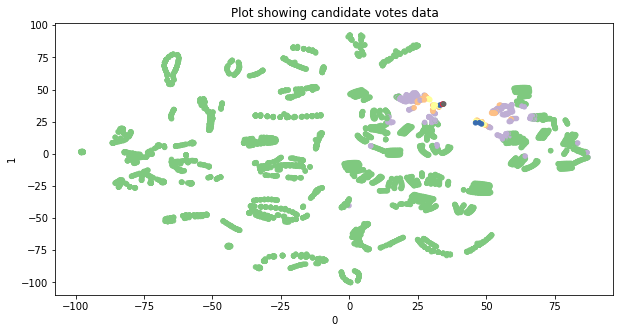

In [ ]:
tsne_election_df.plot.scatter(0, 1, c = election_df["candidatevotes"], cmap = "Accent", figsize=(10,5), sharex = False, title="Plot showing candidate votes data", colorbar=False, legend= True)
plt.show();

2.Plot for column "totalvotes"

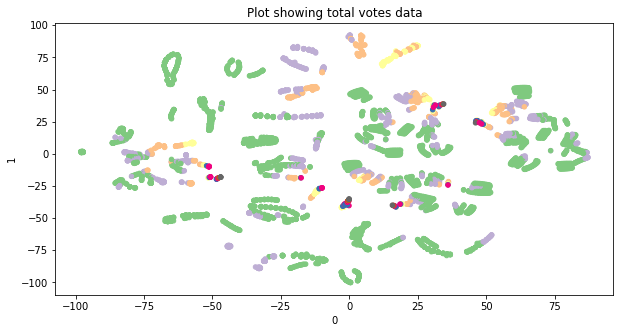

In [ ]:
tsne_election_df.plot.scatter(0, 1, c = election_df["totalvotes"], cmap = "Accent", figsize=(10,5), sharex = False, title="Plot showing total votes data", colorbar=False)
plt.show();

### Using DBSCAN for clustering

**Importing required libraries and classes**

In [ ]:
from sklearn.cluster import DBSCAN

**Instansiating class DBSCAN**

In [ ]:
dbscan_election = DBSCAN(eps = 3.25, min_samples = 2)

**Fitting and predicting the data to the instantiated class**

We can use `.fit_predict(database)` to fit and predict the dataset. The same has to be stored in a variable for further use.

Also we are creating a new column in the 2D dataframe to store values of the probabilities predicted

In [ ]:
tsne_election_df["election_fit_predict"] = dbscan_election.fit_predict(tsne_election_df)

In [ ]:
tsne_election_df.head()

,0,1,election_fit_predict
0,-1131031.625,493354.718750,-1
1,-1150524.625,339488.031250,-1
2,-1212734.750,-151465.937500,-1
3,-1213052.750,-153968.203125,-1
4,-1213645.250,-158624.640625,-1


### Plotting of data

Visualising clusters for the dataset of **tsne_election_df**

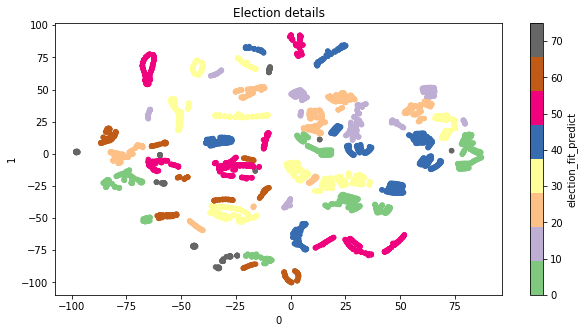

In [ ]:
tsne_election_df.plot.scatter(0, 1, c="election_fit_predict", cmap='Accent',figsize=(10,5), sharex = False)
plt.title("Election details");

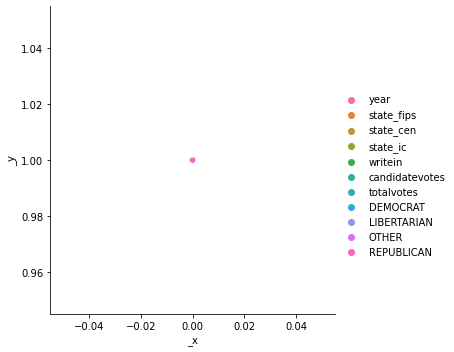

In [ ]:
sns.relplot(x = 0, y = 1, hue = election_df.columns);